In [46]:
import numpy as np 
import matplotlib.pyplot as plt 
import h5py 
import scipy.stats as stats 
from statsmodels.tsa import api as tsa 
from statsmodels.tsa.arima_model import ARIMA 
%matplotlib inline 

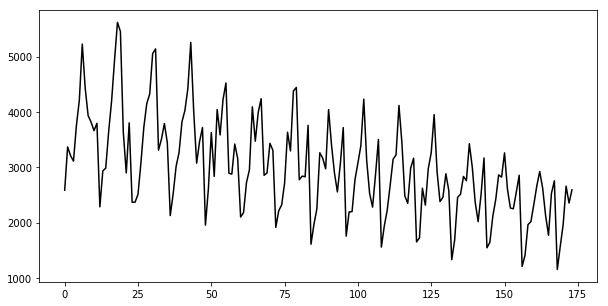

In [47]:
file = h5py.File('Fort.mat', 'r')  
data = file.get('Fort')  
Fort = np.array(data) 
plt.figure(figsize = (10, 5)) 
plt.plot(Fort, 'k') 
plt.show() 

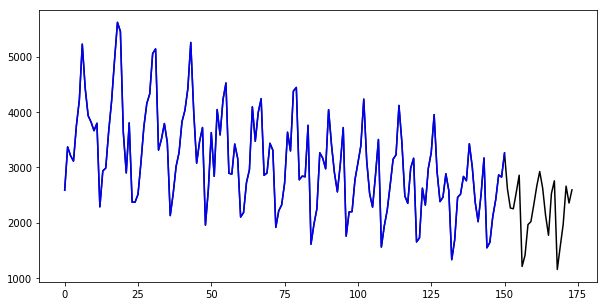

In [48]:
Z = Fort[:len(Fort)-24+1] # truncate the last forecasted 24 points 
t=np.arange(0, len(Z), 1) # time-span for time series 
t=t.reshape(-1,1) 
plt.figure(figsize = (10, 5)) 
plt.plot(Fort, 'k') # initial data 
plt.plot(t, Z, 'b') # truncated data 
plt.show()

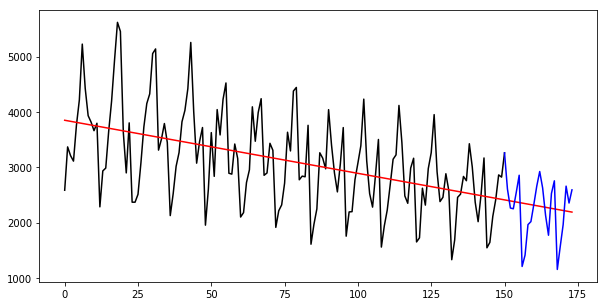

In [49]:
##################################sklearn##########################
t=np.arange(0, len(Z), 1) # time-span of truncated data 
t=t.reshape(-1,1) 
t0=np.arange(0, len(Fort), 1) # time-span of full time series 
t0=t0.reshape(-1,1) 
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(t, Z) # regression model 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Z, 'k') 
y1=reg.predict(t0)
plt.plot(t0, y1, 'r') # forecast and predict future observations 
plt.plot(t0[-24:], Fort[-24:], 'b') # real observations to compare 
plt.show() 

[3849.23884629   -9.58949808]


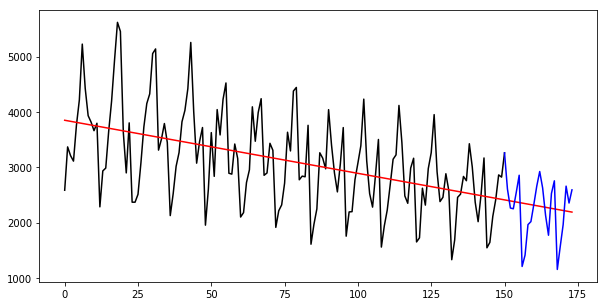

In [50]:
######################################statsmodels###################
import statsmodels.api as sm 
x_ = sm.add_constant(t) 
smm = sm.OLS(Z, x_)  
res = smm.fit() # create the linear regression model 
print(res.params)  
plt.figure(figsize = (10, 5)) 
plt.plot(t, Z, 'k') 
plt.plot(t0, res.predict(sm.add_constant(t0)), 'r') # forecast 
plt.plot(t0[-24:], Fort[-24:], 'b') # real observations to compare 
plt.show()

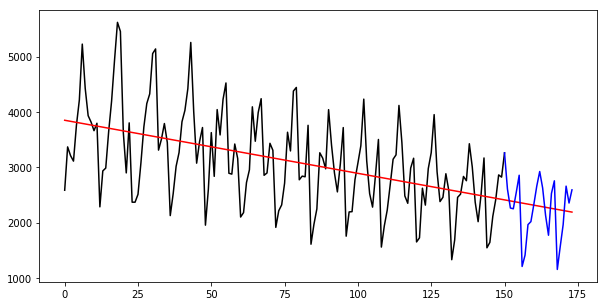

In [51]:
#################################ployfit######################
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1)  
p = np.poly1d(bb) # polynomial class 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Z, 'k') 
plt.plot(t0, p(t0), 'r') # data estimated on full time-span 
plt.plot(t0[-24:], Fort[-24:], 'b') 
plt.show() 

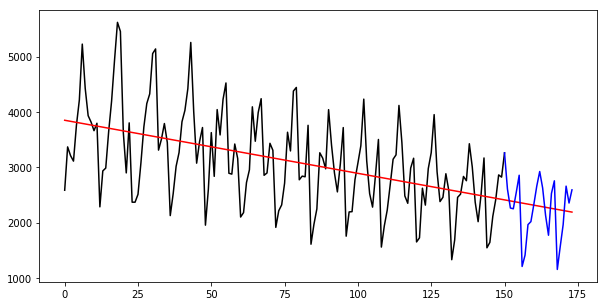

In [52]:
########################scipy.optimize########################
def func(t, b0, b1): 
    return b0 + b1 * t 
 
from scipy.optimize import curve_fit 
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0]) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Z, 'k') 
plt.plot(t0, t0*popt[1]+popt[0], 'r') # here is the forecast 
plt.plot(t0[-24:], Fort[-24:], 'b') 
plt.show()

[ 5.70920914e-04 -9.67513622e+00  3.85136553e+03]


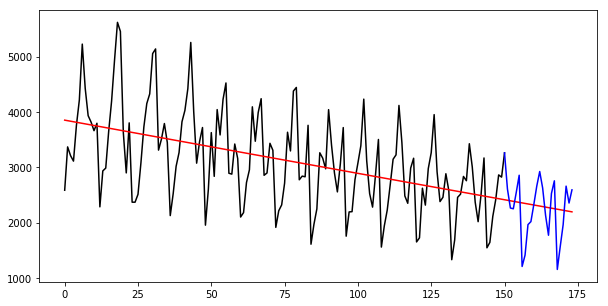

In [53]:
###########second order#########################

b = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 2)  
print(b)
y2 =b[0] * t0 ** 2 + b[1] * t0+ b[2]
plt.figure(figsize = (10, 5)) 
plt.plot(t, Z, 'k') 
plt.plot(t0, y2, 'r') # data estimated on full time-span 
plt.plot(t0[-24:], Fort[-24:], 'b') 
plt.show() 

[ 9.41900567e-04 -2.11356707e-01  2.99832429e+00  3.69558459e+03]


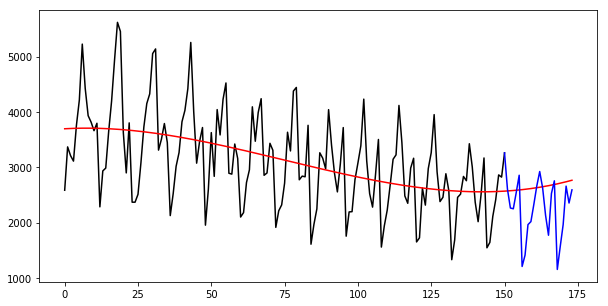

In [54]:
####################third order###################
b = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 3)  
print(b)
y3= b[0] * t0 ** 3 + b[1] * t0 ** 2 + b[2] * t0 + b[3]
plt.figure(figsize = (10, 5)) 
plt.plot(t, Z, 'k') 
plt.plot(t0, y3, 'r') # data estimated on full time-span 
plt.plot(t0[-24:], Fort[-24:], 'b') 
plt.show() 

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [56]:
############Mean error of the forcast######################
print(mean_absolute_error(Fort,y1))
print(np.mean(np.abs(Fort-y1)))

574.0522363713577
574.0522363713577


In [57]:
###################STD of the fercast error##################
print('MSE：',mean_squared_error(Fort,y1))
print('RMSE：',np.sqrt(mean_squared_error(Fort,y1)))

MSE： 524618.2252095501
RMSE： 724.3053397632452


In [58]:
#########################Mean error of the forecast approximation#######
M=len(Fort)
print(M)
E=(1/M)*np.sum((abs(Fort-y1))/Fort)*100
print(E)

174
21.46457595013059


In [61]:
###################Coefficient of disparity 1 ########################
KH1=np.sqrt(np.sum((Fort-y1)**2)/(np.sum((Fort)**2)))
print(KH1)

0.23100919209630752


In [62]:
###################Cofficient of dsparity 2 #####################
KH2=np.sqrt(np.sum((Fort-y1)**2)/(np.sum((np.mean(Fort)-y1)**2)))
print(KH2)

1.5034492508249602


In [63]:
def accuracy(t,p):
    M=len(t)
    mean=np.mean(np.abs(t-p))
    STD=np.sqrt(np.sum((t-p)**2)/M)
    E=(1/M)*np.sum((abs(t-p))/t)
    KH1=np.sqrt(np.sum((t-p)**2)/(np.sum((t)**2)))
    KH2=np.sqrt(np.sum((t-p)**2)/(np.sum((np.mean(p)-t)**2)))
    return mean ,STD, E ,KH1, KH2
    

In [64]:
print(accuracy(Fort,y1))

(574.0522363713577, 724.3053397632452, 0.2146457595013059, 0.23100919209630752, 0.8256404853732364)


In [65]:
def confidence1(t,p,tao):
    e=t-p
    N=len(t)
    s=np.sqrt(np.sum(e**2)/(N-2))
    dar=1.96*s*np.sqrt(1+1/N+((tao-np.mean(tao))**2/np.sum((tao-np.mean(tao))**2)))
    tb=tao+dar
    th=tao-dar
    return tb,th

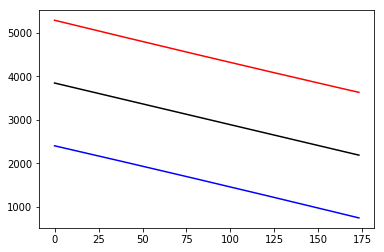

In [66]:
plt.plot(confidence1(Fort,y1,y1)[0],'r')
plt.plot(y1,'k')
plt.plot(confidence1(Fort,y1,y1)[1],'b')
plt.show()

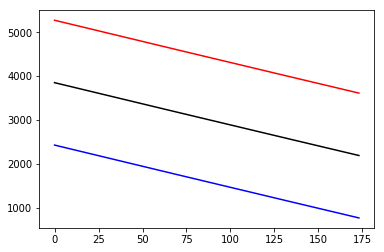

In [67]:
def confidence2(t,p):
    M=len(t)
    dar=1.96*np.sqrt(np.sum((t-p)**2)/M)
    tb=p+dar
    th=p-dar
    return tb,th
plt.plot(confidence2(Fort,y2)[0],'r')
plt.plot(y2,'k')
plt.plot(confidence2(Fort,y2)[1],'b')
plt.show()

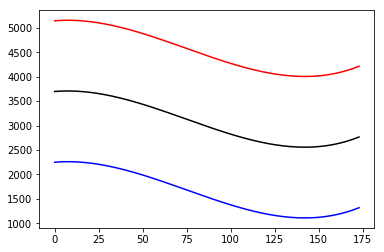

In [68]:
plt.plot(confidence2(Fort,y3)[0],'r')
plt.plot(y3,'k')
plt.plot(confidence2(Fort,y3)[1],'b')
plt.show()

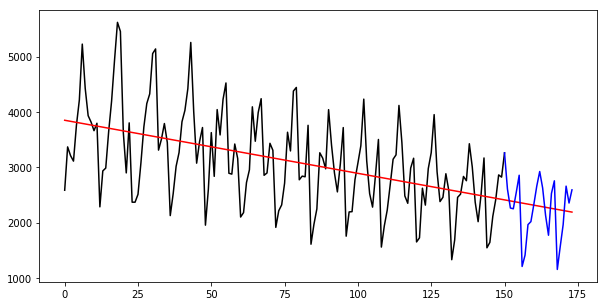

In [69]:
#####14 The method of regressive functions from library scipy.optimize allows one to establish any type of function. 
##Just for your interest, try to describe your own function in this method, that will provide some meaningful forecast of presented data.
##Check its accuracy accordingly and estimate its empirical confidence intervals. 
########################scipy.optimize########################
def func(t, b0, b1): 
    return b0 + b1 * t 
 
from scipy.optimize import curve_fit 
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0]) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Z, 'k') 
y11=t0*popt[1]+popt[0]
plt.plot(t0,y11, 'r') # here is the forecast 
plt.plot(t0[-24:], Fort[-24:], 'b') 
plt.show()

In [71]:
print(accuracy(Fort,y11))

(574.0522363715338, 724.3053397633082, 0.2146457595018083, 0.2310091920963276, 0.8256404853732425)


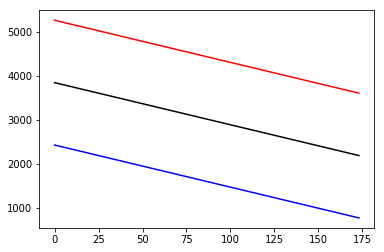

In [73]:
plt.plot(confidence2(Fort,y11)[0],'r')
plt.plot(y11,'k')
plt.plot(confidence2(Fort,y11)[1],'b')
plt.show()

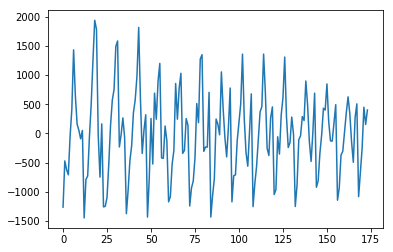

In [79]:
####15.Now let’s create a forecast with another type of learned models called ARIMA models.
##First of all, you should note, that the creation of ARIMA model in initial pure form requires the data to be centered to zero 
##(i.e. its expectation value is constant and close to zero; trend-stationary data form). 
##Our practical real data obviously do not satisfy this condition. 
##What to do? Obviously, reform the data into trend-stationary form: estimate the linear trend of data (see linear regression of first order), 
##and subtract this linear trend from time series, reforming the data into zero-mean form
zm= Fort-y1
plt.plot(zm)
plt.show()

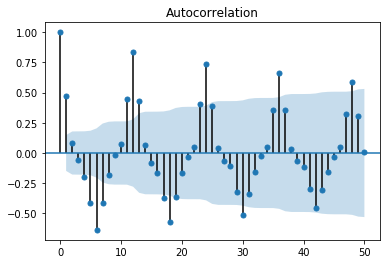

In [80]:
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(zm, lags=50)
plt.show()

In [81]:
arima1 = ARIMA(zm ,order = (5, 0, 4)) 
model_fit1 = arima1.fit(disp = False, trend='nc') 
print(model_fit1.summary()) 

arima2 = ARIMA(zm, order = (12, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(zm, order = (13, 0, 2))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  174
Model:                     ARMA(5, 4)   Log Likelihood               -1298.238
Method:                       css-mle   S.D. of innovations            411.200
Date:                Sat, 25 May 2019   AIC                           2616.476
Time:                        21:15:22   BIC                           2648.067
Sample:                             0   HQIC                          2629.291
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.6597      0.106     15.724      0.000       1.453       1.867
ar.L2.y       -1.8632      0.191     -9.765      0.000      -2.237      -1.489
ar.L3.y        1.5754      0.222      7.097      0.0

In [30]:
print('For our test time series data the AR(2) should be the best model, based on comparing AIC, BIC and HQIC with other models. ')

For our test time series data the AR(2) should be the best model, based on comparing AIC, BIC and HQIC with other models. 


<function matplotlib.pyplot.show(*args, **kw)>

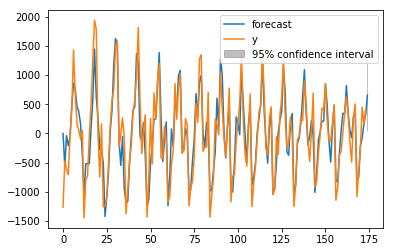

In [82]:
model_fit2.plot_predict(0, len(zm))
plt.show

<Figure size 720x360 with 0 Axes>

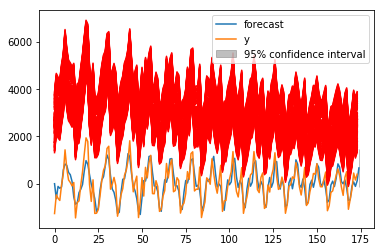

In [86]:
plt.figure(figsize = (10, 5)) 
model_fit1.plot_predict(0,len(zm)) # forecast of ARIMA model 
trend_as_func_of_t0=model_fit1.predict(0, len(zm)) 
plt.plot(t0, Fort-(trend_as_func_of_t0), 'r') # Initial data minus trend 
plt.show()

In [87]:
f_point=model_fit1.predict(len(Z), len(zm)) # output is the array of the forecasted points
print(f_point)

[ 696.48249441   11.87524459  -93.00454138  150.73297005 -222.36381888
 -788.96881612 -678.67360288  -57.06238555  107.24052906 -119.63225135
  223.69313751  840.28303618  699.53136868   89.07302911   -4.50077481
  157.81534033 -183.78530354 -712.20503387 -680.32663382 -110.54129408
   74.42478703 -113.00962256  120.93719909  667.46529949]


In [88]:
pr=model_fit1.predict(len(Z), len(zm))
print(accuracy(Fort[-24:],pr))

(2263.4383184717494, 11589.204500522203, 23.96420723827672, 4.975679721446929, 4.98222607428281)


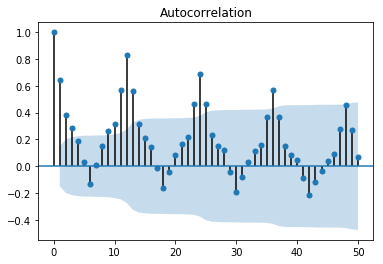

In [89]:
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(Fort, lags=50)
plt.show()

In [94]:
arima1 = ARIMA(Fort ,order = (2, 0, 2)) 
model_fit1 = arima1.fit(disp = False, trend='nc') 
print(model_fit1.summary()) 

arima2 = ARIMA(Fort, order = (12, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Fort, order = (13, 0, 2))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

c:\python36\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  174
Model:                     ARMA(2, 2)   Log Likelihood               -1394.908
Method:                       css-mle   S.D. of innovations            726.212
Date:                Sat, 25 May 2019   AIC                           2799.817
Time:                        21:22:57   BIC                           2815.612
Sample:                             0   HQIC                          2806.224
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.9857        nan        nan        nan         nan         nan
ar.L2.y       -0.9857        nan        nan        nan         nan         nan
ma.L1.y       -1.2317      0.108    -11.377      0.0

In [95]:
print('For our test time series data the AR(2) should be the best model, based on comparing AIC, BIC and HQIC with other models. ')

For our test time series data the AR(2) should be the best model, based on comparing AIC, BIC and HQIC with other models. 


<function matplotlib.pyplot.show(*args, **kw)>

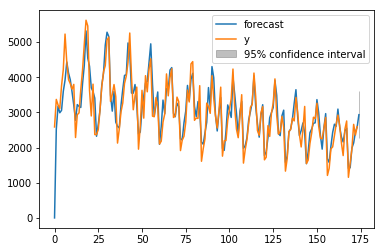

In [96]:
model_fit2.plot_predict(0, len(Fort))
plt.show

<Figure size 720x360 with 0 Axes>

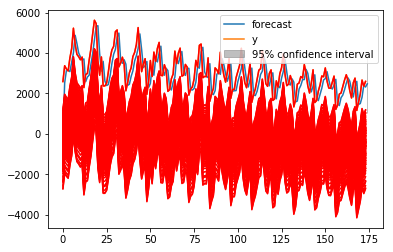

In [98]:
plt.figure(figsize = (10, 5)) 
model_fit1.plot_predict(0, len(Fort)) # forecast of ARIMA model 
trend_as_func_of_t0=model_fit2.predict(0, len(Fort)) 
plt.plot(Fort-(trend_as_func_of_t0), 'r') # Initial data minus trend 
plt.show()

In [100]:
f_point=model_fit2.predict(len(Z), len(Fort)) # output is the array of the forecasted points
print(f_point)

[2986.08474512 2343.09420116 1954.60375607 2563.30921332 2964.16306985
 1680.066663   1576.88612353 2039.60885019 2429.89780787 2663.34467048
 2604.69485986 3093.08848062 2585.33305999 2305.03864992 2157.87632627
 2471.08398071 2551.90049814 1407.14380366 1426.17040335 1985.2613543
 2131.36518138 2440.0537599  2585.46352618 2933.63629933]


In [101]:
pre=model_fit2.predict(len(Z), len(Fort))
print(accuracy(Fort[-24:],pre))

(569.9847187875021, 3508.3717110037674, 7.100261930477349, 1.506275428736539, 6.49874330733058)
